<a href="https://colab.research.google.com/github/amirAHS2000/cv_course/blob/master/vision_transformers/OneFormer_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q natten

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from transformers import OneFormerProcessor, OneFormerForUniversalSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [6]:
def run_segmentation(image, task_type):
    """Performs image segmentation based on the given task type.

    Args:
        image (PIL.Image): The input image.
        task_type (str): The type of segmentation to perform ('semantic', 'instance', or 'panoptic').

    Returns:
        PIL.Image: The segmented image.

    Raises:
        ValueError: If the task type is invalid.
    """

    processor = OneFormerProcessor.from_pretrained(
        "shi-labs/oneformer_ade20k_dinat_large"
    )  # Load once here
    model = OneFormerForUniversalSegmentation.from_pretrained(
        "shi-labs/oneformer_ade20k_dinat_large"
    )

    if task_type == "semantic":
        inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt")
        outputs = model(**inputs)
        predicted_map = processor.post_process_semantic_segmentation(
            outputs, target_sizes=[image.size[::-1]]
        )[0]

    elif task_type == "instance":
        inputs = processor(images=image, task_inputs=["instance"], return_tensors="pt")
        outputs = model(**inputs)
        predicted_map = processor.post_process_instance_segmentation(
            outputs, target_sizes=[image.size[::-1]]
        )[0]["segmentation"]

    elif task_type == "panoptic":
        inputs = processor(images=image, task_inputs=["panoptic"], return_tensors="pt")
        outputs = model(**inputs)
        predicted_map = processor.post_process_panoptic_segmentation(
            outputs, target_sizes=[image.size[::-1]]
        )[0]["segmentation"]

    else:
        raise ValueError(
            "Invalid task type. Choose from 'semantic', 'instance', or 'panoptic'"
        )

    return predicted_map

In [7]:
def show_image_comparison(image, predicted_map, segmentation_title):
    """Displays the original image and the segmented image side-by-side.

    Args:
        image (PIL.Image): The original image.
        predicted_map (PIL.Image): The segmented image.
        segmentation_title (str): The title for the segmented image.
    """

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_map)
    plt.title(segmentation_title + " Segmentation")
    plt.axis("off")
    plt.show()

| 2024-11-29 15:00:23,687 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dqkrpb`, which is deprecated in favor of `natten.functional.na2d_qk`. Please consider switching, as this op will be removed soon.
| 2024-11-29 15:01:30,577 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dav`, which is deprecated in favor of `natten.functional.na2d_av`. Please consider switching, as this op will be removed soon.
| 2024-11-29 15:01:44,985 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dqkrpb`, which is deprecated in favor of `natten.functional.na2d_qk`. Please consider switching, as this op will be removed soon.
| 2024-11-29 15:03:21,328 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten2dav`, which is deprecated in favor of `natten.functional.na2d_av`. Please consider switching, as this op will be removed soon.
| 2024-11-29 15:03:40,

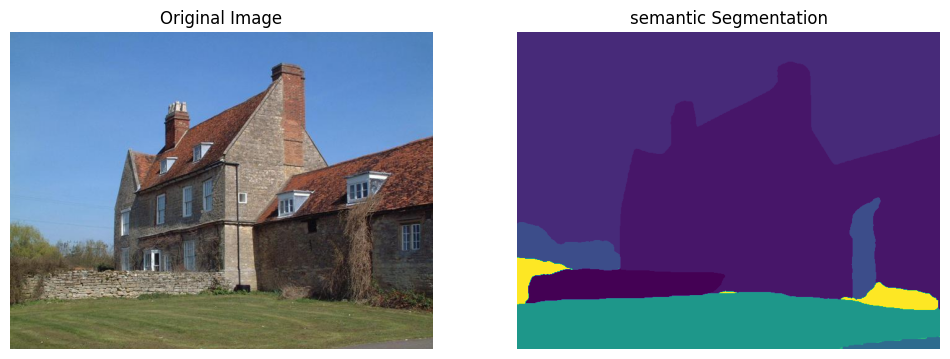

In [8]:
url = "https://huggingface.co/datasets/shi-labs/oneformer_demo/resolve/main/ade20k.jpeg"
response = requests.get(url, stream=True)
response.raise_for_status()  # Check for HTTP errors
image = Image.open(response.raw)

task_to_run = "semantic"
predicted_map = run_segmentation(image, task_to_run)
show_image_comparison(image, predicted_map, task_to_run)